## Введение в теорию вероятностей. Домашнее задание

###Итоги модуля 
Теория вероятностей возникла на основе анализа азартных игр. Определение закономерности исходов бросков игральных костей и вычисление шансов на выигрыш в таких играх привели учёных к интуитивному определению вероятности. Классическая формула вероятности — это отношение числа благоприятных исходов ко всем исходам. 
На уроке изучались вероятности, возникающие на примере бросания игральных кубиков и подбрасывания монетки. Также мы обсудили разницу вероятностных и статистических моделей. В конце модуля было введено понятие геометрической вероятности и рассмотрен связанный с ней метод Монте-Карло.

###Цели домашнего задания
- Закрепить полученные знания об определении вероятности.
- С помощью ряда статистических экспериментов лучше осознать разницу между вероятностной и статистической картиной мира.
- Ближе познакомиться с поведением случайных величин на практике, применив метод Монте-Карло.

###Что нужно сделать
В домашнем задании предлагается воспользоваться Jupyter Notebook для проведения наглядных статистических экспериментов. Это задачи на анализ подбрасывания монетки, бросания двух игральных кубиков и подсчёта площадей методом Монте-Карло. 
Нужно запустить готовый код, дописать его там, где требуется, посмотреть, как работает эксперимент и как зависят его результаты от различных факторов. В каждой задаче также предлагается ответить на несколько вопросов и аргументировать свой ответ.

### Что оценивается
Умение построить взаимосвязь между теоретическими вероятностями и статистическими экспериментами. В каждой задаче требуется поэкспериментировать с разными значениями параметров функций и ответить на вопросы. Задача считается выполненной, если выполнены все её условия, а также даны аргументированные ответы на вопросы.
Во втором задании также требуется дописать программу.

### Как отправить задание на проверку
Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму на платформе.

Кроме того, задания содержат несколько вопросов. Напишите ответы на эти вопросы сразу в форме. Постарайтесь аргументировать ваш ответ.


### Импорт библиотек

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

###**Задание 1.** 
Функция `coinToss` позволяет смоделировать процесс подбрасывания монетки любое количество раз. Это число задаётся параметром `number`. В результате функция выводит число испытаний и доли орлов и решек в последнем эксперименте, а также рисует график, на котором представлена суммарная доля выпавших орлов ко всем испытаниям с увеличением номера `n` от 1 до `number`.

1. Поэкспериментируйте и запустите функцию на разных значениях number. Проанализируйте поведение графика. Какими свойствами обладает кривая? 

2. К чему стремится доля орлов при увеличении числа испытаний? Как можно это объяснить?


In [ ]:
Ответы:
1. Думаю, что кривая представляет собой график доли орлов от общего числа бросков. 
Она может колебаться в начале, но по мере увеличения числа бросков становится более стабильной и приближается к 0.5
2. Доля орлов стремится к 0.5 при увеличении числа бросков. Это соответствует теоретическому ожиданию, так как вероятность 
выпадения орла и решки при честном броске монеты равна. По моему мнению это явление объясняется законом больших чисел, который утверждает,
что при достаточном количестве испытаний относительная частота события (в данном случае выпадения орла) будет стремиться к его теоретической вероятности. 
Чем больше бросков мы делаем, тем ближе результаты будут к ожидаемым значениям (в данном случае 50% для орлов и 50% для решек).

Число испытаний: 100
Доля орлов: 0.52 Доля решек: 0.48


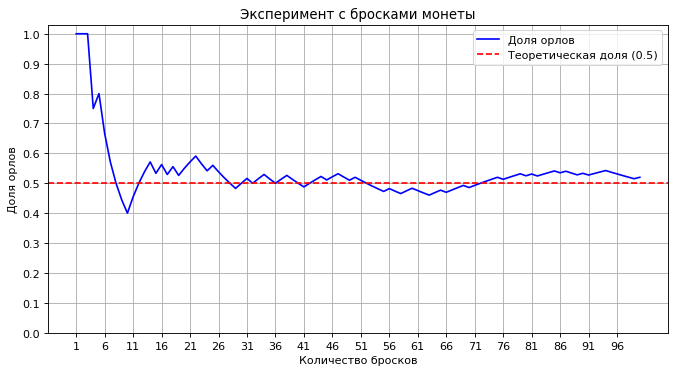

Число испытаний: 1000
Доля орлов: 0.48 Доля решек: 0.52


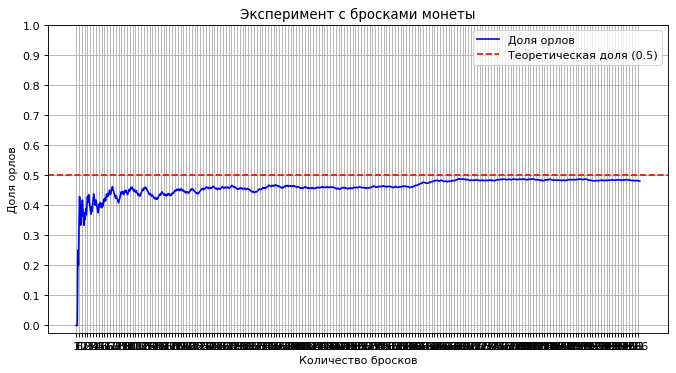

Число испытаний: 10000
Доля орлов: 0.4985 Доля решек: 0.5015


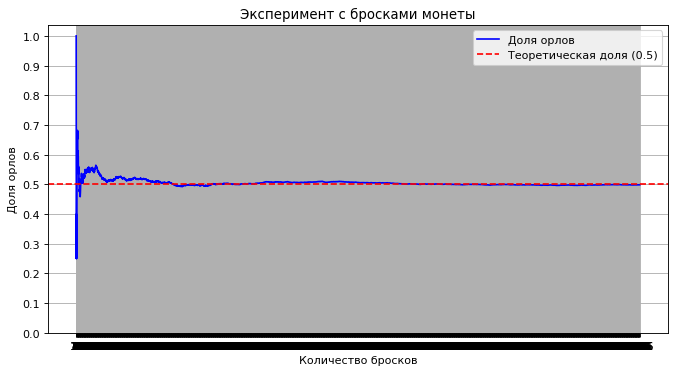

In [3]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number + 1)  
    
    for i in rangeList: 
        flip = random.randint(0, 1)  
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        
        proportionList.append(orli / i)  
    
    print("Число испытаний: " + str(number))
    print("Доля орлов: " + str(orli / number) + " Доля решек: " + str(reshki / number))
      
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(rangeList, proportionList, label='Доля орлов', color='blue')
    plt.axhline(y=0.5, color='red', linestyle='--', label='Теоретическая доля (0.5)')
    plt.title('Эксперимент с бросками монеты')
    plt.xlabel('Количество бросков')
    plt.ylabel('Доля орлов')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number + 1, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.legend()
    plt.grid()
    plt.show()

coinToss(100)
coinToss(1000)
coinToss(10000)

Число испытаний: 5
Доля орлов: 0.6 Доля решек: 0.4


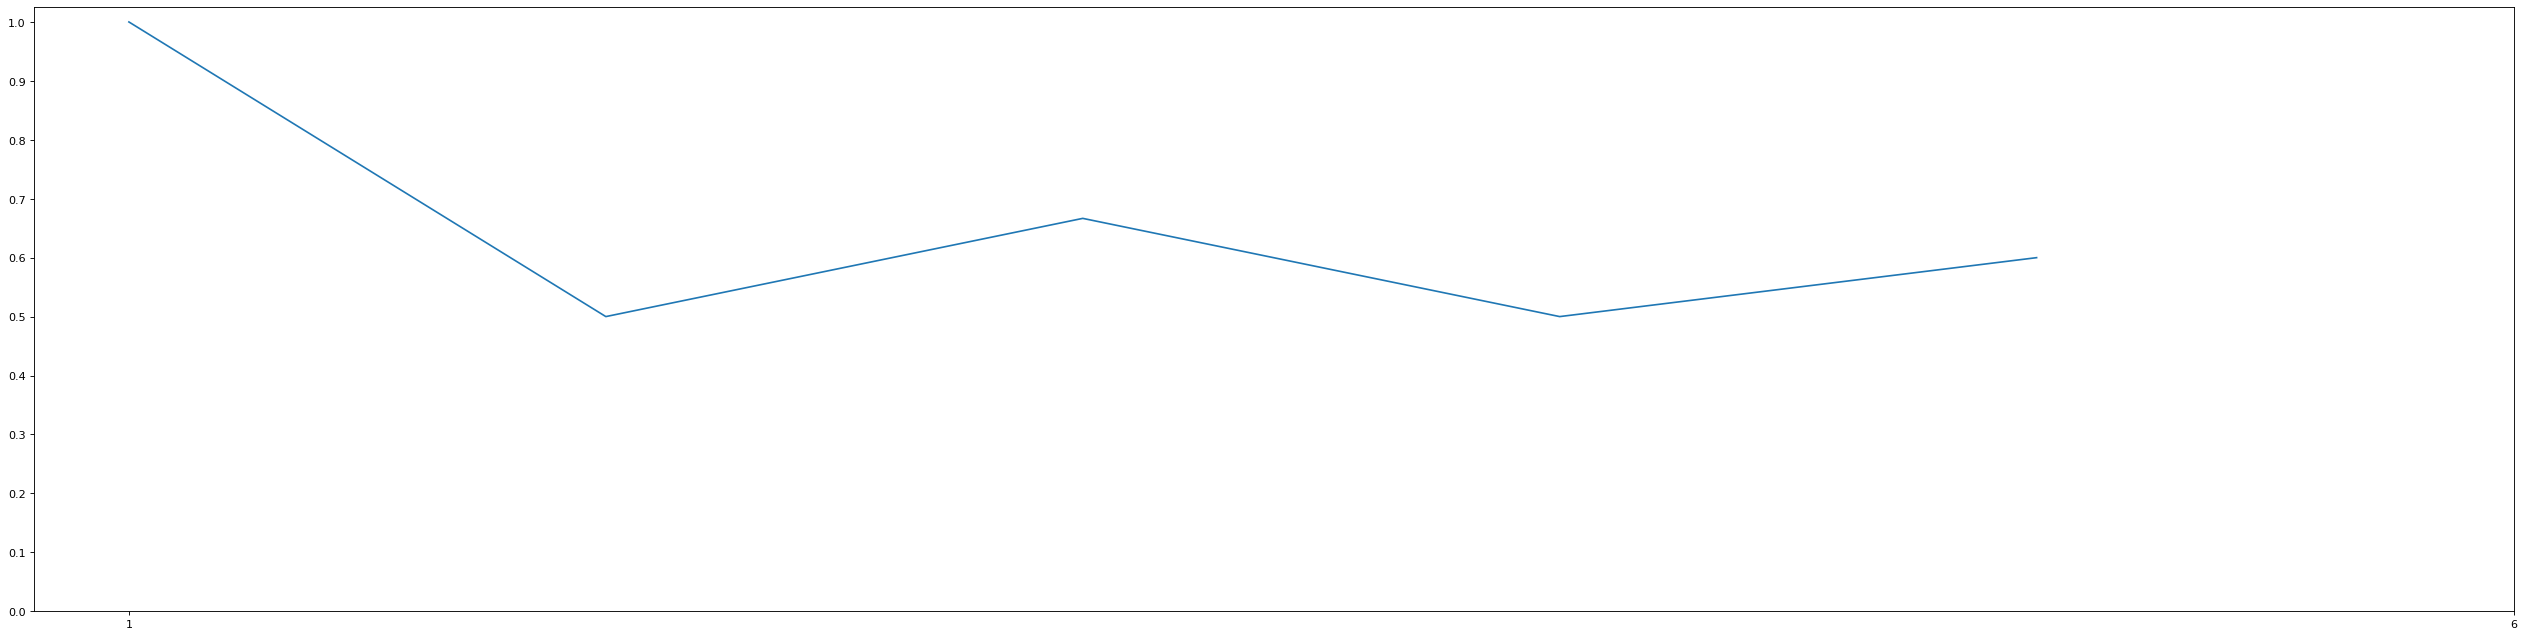

In [4]:
coinToss(5)

###**Задание 2.** 
Функция `diceLoss` моделирует бросок двух игральных кубиков некоторое количество раз (`number`). В результате выводится вероятность того, что сумма на кубиках будет больше параметра функции `k` (считается доля выпадений, на которых сумма превысит `k`, относительно всех сумм).

1. Поэкспериментируйте с разными `number` и `k`. К каким значениям будет стремиться вероятность при фиксированном `k` и больши́х `number`? Что будет, если брать `k` = 6, 8? Как полученные вероятности будут связаны с теоретическими вероятностями?

2. К чему будет стремиться общая сумма бросков, поделённая на их количество? К чему стремится средняя разность текущего броска и полученного среднего значения? Напишите код на Python на основе исходной функции и объясните результат.


In [ ]:
1.При фиксированном  k  и увеличении  number , вероятность того, что сумма на кубиках будет больше  k , будет стремиться к определенному значению. 
Например:
Если  k = 6 , то вероятность будет достаточно высокой, так как большинство комбинаций (например, (1,6), (2,5), (3,4), и т.д.) дают сумму больше 6.
Если  k = 8 , вероятность будет ниже, но все еще достаточно высока.
    
Если брать k = 6, 8?
Для  k = 6  вероятность будет выше, чем для  k = 8 , поскольку больше комбинаций дает суммы больше 6.
При  k = 8  вероятность будет меньше, так как меньшее количество комбинаций даст сумму больше 8.

Теоретическая вероятность может быть рассчитана на основе всех возможных исходов двух кубиков. Всего есть 36 возможных комбинаций (6 на первом кубике и 6 на втором). Например:
Для  k = 6 : все комбинации с суммой больше 6 составляют большую часть из этих 36.
Для  k = 8 : нужно учитывать только те комбинации, которые дают сумму больше 8.

2.Общая сумма бросков будет стремиться к среднему значению суммы двух кубиков, которое равно 7 (так как среднее значение каждого кубика равно 3.5).
Средняя разность текущего броска и полученного среднего значения будет стремиться к нулю по мере увеличения количества бросков. Это связано с тем, 
что по мере увеличения числа бросков индивидуальные отклонения будут компенсироваться.

Вероятность, что сумма на кубиках превысит 8 при 1000 испытаниях: 0.261


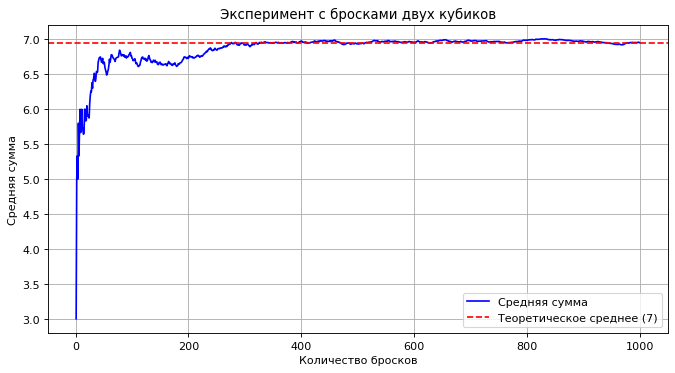

Вероятность, что сумма на кубиках превысит 6 при 1000 испытаниях: 0.575


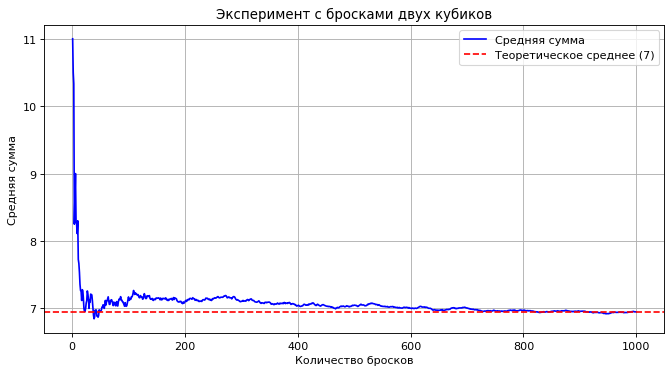

Вероятность, что сумма на кубиках превысит 8 при 10000 испытаниях: 0.2846


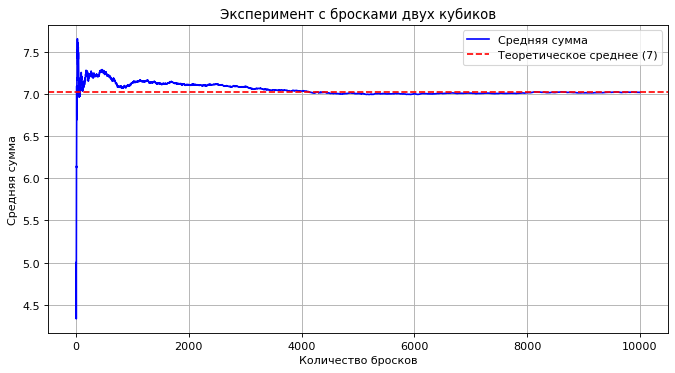

Вероятность, что сумма на кубиках превысит 6 при 10000 испытаниях: 0.5819


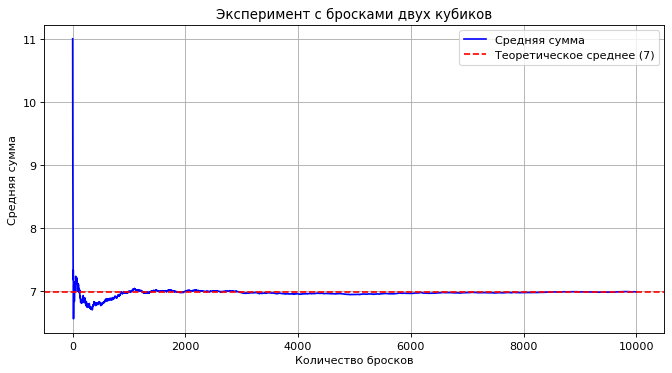

In [7]:
def diceToss(number, k):
    sumList, recordList = [], []
    rangeList = range(1, number + 1)

    for i in rangeList: 
        flip1 = random.randint(1, 6)  
        flip2 = random.randint(1, 6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    probability = sum([x > k for x in sumList]) / number
    print('Вероятность, что сумма на кубиках превысит ' + str(k) + 
          ' при ' + str(number) + ' испытаниях: ' + str(probability))
        
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(rangeList, np.cumsum(sumList) / rangeList, label='Средняя сумма', color='blue')
    plt.axhline(y=np.mean(sumList), color='red', linestyle='--', label='Теоретическое среднее (7)')
    plt.title('Эксперимент с бросками двух кубиков')
    plt.xlabel('Количество бросков')
    plt.ylabel('Средняя сумма')
    plt.legend()
    plt.grid()
    plt.show()

diceToss(1000, 8)
diceToss(1000, 6)
diceToss(10000, 8)
diceToss(10000, 6)

In [ ]:
diceToss(100, 6)

Вероятность, что сумма на кубиках превысит 6 при 100 испытаниях: 0.57


###**Задание 3.**
 
Как было рассказано в уроке, метод Монте-Карло — это серия численных методов, позволяющих моделировать случайные процессы для изучения некоторого явления. Один из способов применения метода Монте-Карло заключается в измерении различных площадей. Если рассмотреть географическую карту и случайным образом равномерно разбросать на ней точки с произвольными координатами, то окажется, что количество точек в определённом регионе будет пропорционально площади этого региона. Следующая задача как раз на эту тему. 

Ниже представлен код, который делает следующее. На отрезке от −1 до 1 берутся два значения, `x` и `y`, из которых строится точка на плоскости с координатами (x, y). Если такая точка попадает внутрь единичного круга с центром в нуле, то такая точка отмечается синим цветом, в противном случае — красным. Количество точек задаётся параметром `n`.

Вызовите функцию для разных `n`. К чему будет стремиться доля синих точек? Как это связано с площадями геометрических фигур? Проанализируйте, как меняется доля синих точек с ростом количества точек, и сравните её с теоретическим значением площади.


In [ ]:
Доля синих точек будет стремиться к (площадь круга)/(площадь квадрата). Площадь единичного круга равна π ⋅ r² = π (где  r = 1 ), а площадь квадрата 
со стороной 2 равна 4. Таким образом, теоретическая доля синих точек будет равна:
π / 4 ≈ 0.7854
Количество точек внутри фигуры (в данном случае круга) делится на общее количество точек (в квадрате), что дает приближенную оценку отношения площадей


Запуск для n = 100
Число точек внутри круга: 78
Число точек снаружи круга: 22
Доля точек внутри круга: 0.78


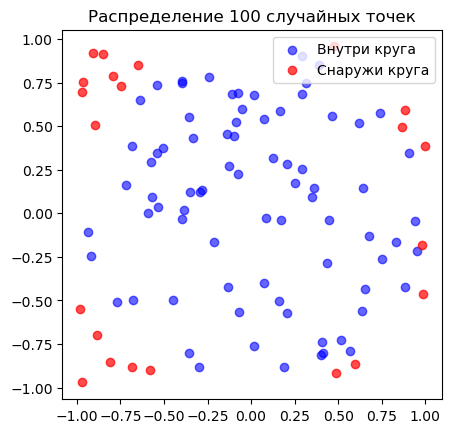


Запуск для n = 1000
Число точек внутри круга: 785
Число точек снаружи круга: 215
Доля точек внутри круга: 0.785


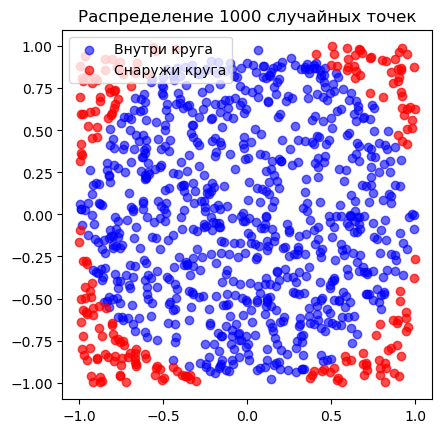


Запуск для n = 10000
Число точек внутри круга: 7799
Число точек снаружи круга: 2201
Доля точек внутри круга: 0.7799


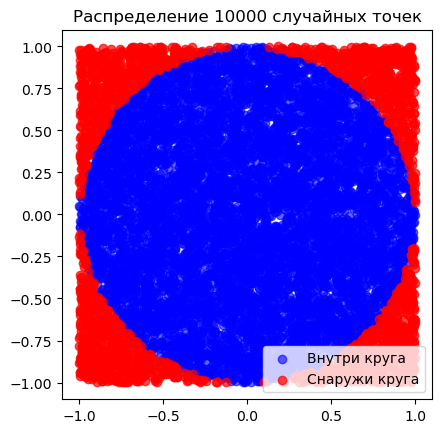


Запуск для n = 100000
Число точек внутри круга: 78657
Число точек снаружи круга: 21343
Доля точек внутри круга: 0.78657


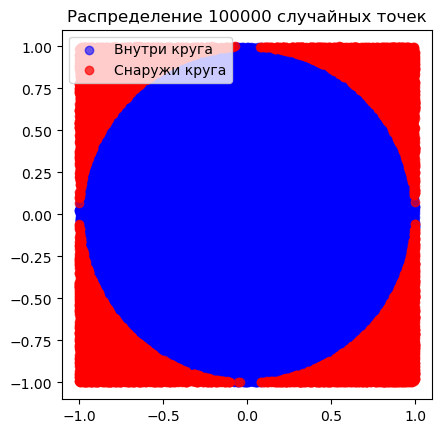

In [9]:
def plot_circle(n):
    x = 2 * np.random.random(int(n)) - 1
    y = 2 * np.random.random(int(n)) - 1
       
    insideX, insideY = x[(x*x + y*y) <= 1], y[(x*x + y*y) <= 1]  
    outsideX, outsideY = x[(x*x + y*y) > 1], y[(x*x + y*y) > 1]  
        
    num_inside = len(insideX)
    num_outside = len(outsideX)
    
    print('Число точек внутри круга:', num_inside)
    print('Число точек снаружи круга:', num_outside)
    print('Доля точек внутри круга:', num_inside / (num_inside + num_outside))
      
    fig, ax = plt.subplots(1)
    ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None, label='Внутри круга')
    ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None, label='Снаружи круга')
    ax.set_aspect('equal')
    ax.set_title(f'Распределение {n} случайных точек')
    ax.legend()
    plt.show()

for n in [100, 1000, 10000, 100000]:
    print(f"\Запуск для n = {n}")
    plot_circle(n)

Число точек внутри круга: 19
Число точек снаружи круга: 6
Доля точек внутри круга: 0.76


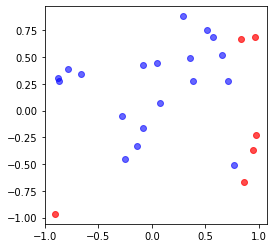

In [6]:
plot_circle(25)